In [173]:
import pandas as pd
import re
import numpy as np

# Loading Datasets

In [174]:
sea_level_df = pd.read_csv("./data/sea_level.csv", header=0)
# print(sea_level_df.to_string)

In [175]:
temperature_df = pd.read_csv("./data/temperature.csv", header=0)
# print(temperature_df.to_string)

In [176]:
ice_melting_df = pd.read_csv("./data/ice_melting.csv", header=0)
# print(ice_melting_df.to_string)

In [177]:
co2_df = pd.read_csv("./data/co2_fuel.csv", header=0)
# print(co2_df.to_string)

# Data Cleaning

In [178]:
sea_level_df.drop(sea_level_df.columns[2:], axis=1, inplace=True)
sea_level_df = sea_level_df.iloc[65:131]
sea_level_df.rename(columns={'CSIRO Adjusted Sea Level' : 'sea_level', 'Year' : 'year'}, inplace = True)
sea_level_df['year'] = sea_level_df['year'].str[0:4].astype('int')
sea_level_df['sea_level'] = sea_level_df['sea_level'] / 10.0
sea_level_df = sea_level_df.reset_index(drop=True)
# print(sea_level_df.to_string)

In [179]:
temperature_df = temperature_df.iloc[::-1]
temperature_df.rename(columns={'Mean' : 'temperature', 'Year' : 'year'}, inplace = True)
temperature_df = temperature_df[temperature_df['Source'] == 'GCAG']
temperature_df.drop('Source', axis=1, inplace = True)
temperature_df = temperature_df.iloc[65:131]
temperature_df = temperature_df.reset_index(drop=True)
# print(temperature_df.to_string)

In [180]:
#ice_melting_df["Change"] = np.nan

#for num in range(len(ice_melting_df.index) - 1):
#        ice_melting_df.loc[num, "Change"] = ice_melting_df.loc[num + 1, "Mean cumulative mass balance"] - ice_melting_df.loc[num, "Mean cumulative mass balance"]

ice_melting_df = ice_melting_df.iloc[:66]
ice_melting_df.drop(['Number of observations'], axis=1, inplace = True)
#ice_melting_df.rename(columns={'Change' : 'ice_melting', 'Year' : 'year'}, inplace = True)
ice_melting_df.rename(columns={'Mean cumulative mass balance' : 'ice_melting', 'Year' : 'year'}, inplace = True)
ice_melting_df['ice_melting'] = -(ice_melting_df['ice_melting'] / 25)
# print(ice_melting_df.to_string)

In [181]:
co2_df.drop(["Gas Fuel", "Liquid Fuel", "Solid Fuel", "Cement", "Gas Flaring", "Per Capita"], axis=1, inplace=True)
co2_df.rename(columns={'Total' : 'co2', 'Year' : 'year'}, inplace = True)
co2_df['co2'] = co2_df['co2'] / 10000.0
co2_df = co2_df.iloc[194:]
co2_df = co2_df.reset_index(drop=True)
# print(co2_df.to_string)

# Final Dataset Creation and Visualization

In [182]:
world_data_df = pd.merge(sea_level_df, temperature_df, on='year')
world_data_df = pd.merge(world_data_df, ice_melting_df, on='year')
world_data_df = pd.merge(world_data_df, co2_df, on='year')
print(world_data_df.to_string)

<bound method DataFrame.to_string of     year  sea_level  temperature  ice_melting     co2
0   1945   0.295669       0.1710     -0.00000  0.1160
1   1946   0.325197      -0.0040      0.04520  0.1238
2   1947   0.337402      -0.0477      0.12760  0.1392
3   1948   0.356299      -0.0487      0.12760  0.1469
4   1949   0.351181      -0.0568      0.15280  0.1419
5   1950   0.359843      -0.1616      0.19548  0.1630
6   1951   0.397244      -0.0132      0.20868  0.1767
7   1952   0.387008       0.0248      0.22828  0.1795
8   1953   0.404331       0.0952      0.25364  0.1841
9   1954   0.392913      -0.1165      0.27300  0.1865
10  1955   0.396457      -0.1354      0.26300  0.2042
11  1956   0.376378      -0.1990      0.27256  0.2177
12  1957   0.429134       0.0488      0.27956  0.2270
13  1958   0.434646       0.1095      0.30772  0.2330
14  1959   0.435827       0.0596      0.33300  0.2454
15  1960   0.450394       0.0204      0.34752  0.2569
16  1961   0.474803       0.0775      0.35740

In [183]:
% pylab inline
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


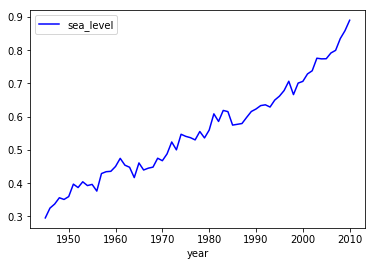

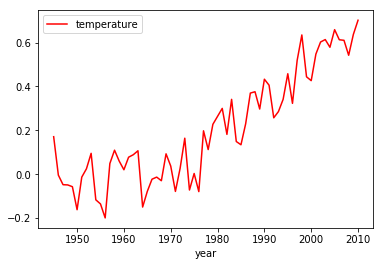

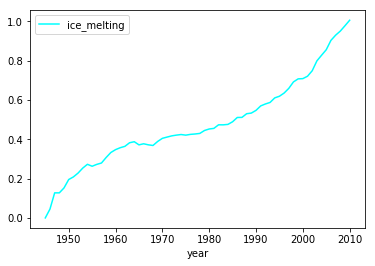

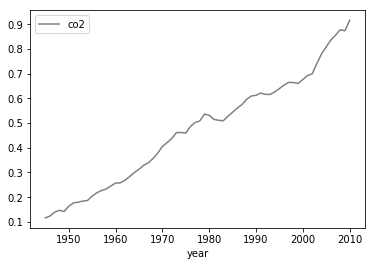

In [184]:
world_data_df.plot(kind='line', x='year', y='sea_level', color='blue')
world_data_df.plot(kind='line', x='year', y='temperature', color='red')
world_data_df.plot(kind='line', x='year', y='ice_melting', color='aqua')
world_data_df.plot(kind='line', x='year', y='co2', color='grey')

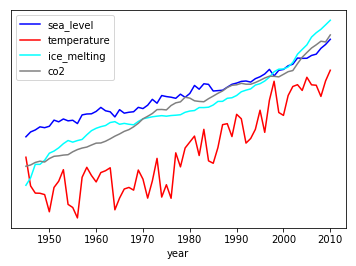

In [185]:
graph = plt.gca()
world_data_df.plot(kind='line', x='year', y='sea_level', color='blue', ax=graph)
world_data_df.plot(kind='line', x='year', y='temperature', color='red', ax=graph)
world_data_df.plot(kind='line', x='year', y='ice_melting', color='aqua', ax=graph)
world_data_df.plot(kind='line', x='year', y='co2', color='grey', ax=graph)
graph.yaxis.set_major_locator(plt.NullLocator())

# Perform Interpolation

In [186]:
from scipy.interpolate import interp1d

In [187]:
year = world_data_df["year"]
temp = world_data_df["temperature"]
ice =  world_data_df["ice_melting"]
co2 = world_data_df["co2"]

In [188]:
extrapolation_temp = interp1d(year, temp, kind="linear", fill_value="extrapolate")
extrapolation_ice = interp1d(year, ice, kind="linear", fill_value="extrapolate")
extrapolation_co2 = interp1d(year, co2, kind="linear", fill_value="extrapolate")

In [189]:
future = pd.DataFrame.from_dict({"year": [new_year for new_year in range(2010, 2101)]})
# print(future.to_string)

In [190]:
extrapolation_temp = [elem[0] for elem in extrapolation_temp(future)]
extrapolation_ice = [elem[0] for elem in extrapolation_ice(future)]
extrapolation_co2 = [elem[0] for elem in extrapolation_co2(future)]

In [191]:
test_df = pd.DataFrame.from_dict({"ice_melting": extrapolation_ice, "temperature": extrapolation_temp, "co2": extrapolation_co2})
# print(test_df.to_string)

# Perfrom Linear Regression

In [194]:
from sklearn.linear_model import LinearRegression

In [195]:
training_data = world_data_df
print(training_data.shape)

(66, 5)


In [196]:
y_train = training_data["sea_level"]
x_train = training_data.drop(["sea_level", "year"], axis=1)
print(x_train.shape, y_train.shape)

(66, 3) (66,)


In [243]:
lr = LinearRegression()
lr.fit(x_train, y_train)
predictions = lr.predict(test_df)
# print(predictions)

In [198]:
future_sea_level_df = sea_level_df

for i in range(0, 91):
    future_sea_level_df = future_sea_level_df.append({'year' : i + 2010, 'sea_level' : predictions[i]}, ignore_index=True)
    
future_sea_level_df['year'] = future_sea_level_df['year'].astype('int')
future_sea_level_df['sea_level'] = future_sea_level_df['sea_level'] * 10 * 2.54

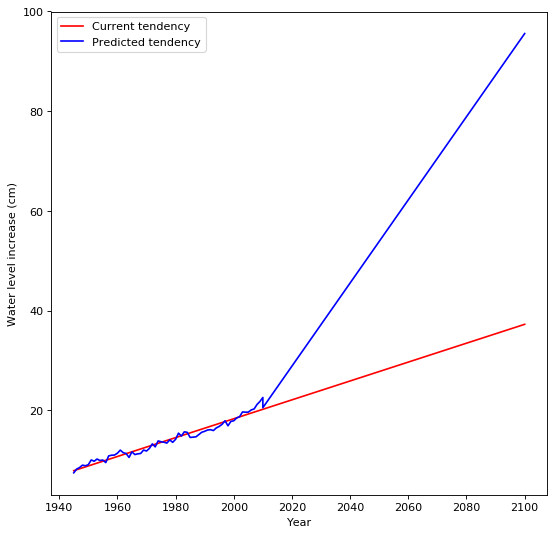

In [242]:
import scipy.stats

linregress = scipy.stats.linregress(sea_level_df['year'], sea_level_df['sea_level'] * 25.4)
x = range(1945,2101)
y = linregress.slope * x + linregress.intercept

figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(x, y, color='red', label = 'Current tendency')
plt.plot(future_sea_level_df['year'], future_sea_level_df['sea_level'], color='blue', label = 'Predicted tendency')
plt.legend(loc='upper left')
plt.xlabel('Year')
plt.ylabel('Water level increase (cm)')
plt.show()